In [1]:
pip install pandas-datareader

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas-datareader --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [6]:
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2023,8,31)
df = yf.download('RELIANCE.NS',start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-01,444.511475,444.907715,439.632721,440.227081,414.639191,2699496
2014-01-02,439.682251,443.793274,430.964874,433.391876,408.201263,2779905
2014-01-03,431.707855,432.574615,423.485779,428.067352,403.186188,5922841
2014-01-06,427.002441,427.572052,421.009247,423.460999,398.847595,6145266
2014-01-07,423.287659,425.937531,416.080963,417.096344,392.852875,7989240


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-24,2481.000000,2514.949951,2469.300049,2487.399902,2487.399902,11863933
2023-07-25,2494.000000,2505.199951,2480.000000,2485.800049,2485.800049,6013010
2023-07-26,2485.000000,2547.000000,2485.000000,2526.199951,2526.199951,6455506
2023-07-27,2534.050049,2537.649902,2490.350098,2502.699951,2502.699951,8613449
2023-07-28,2512.050049,2542.850098,2500.550049,2527.850098,2527.850098,10413926


In [4]:
df = df.reset_index('Date')

In [5]:
df = df.drop(columns=['Adj Close'])

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2014-01-01,444.511475,444.907715,439.632721,440.227081,2699496
1,2014-01-02,439.682251,443.793274,430.964874,433.391876,2779905
2,2014-01-03,431.707855,432.574615,423.485779,428.067352,5922841
3,2014-01-06,427.002441,427.572052,421.009247,423.460999,6145266
4,2014-01-07,423.287659,425.937531,416.080963,417.096344,7989240


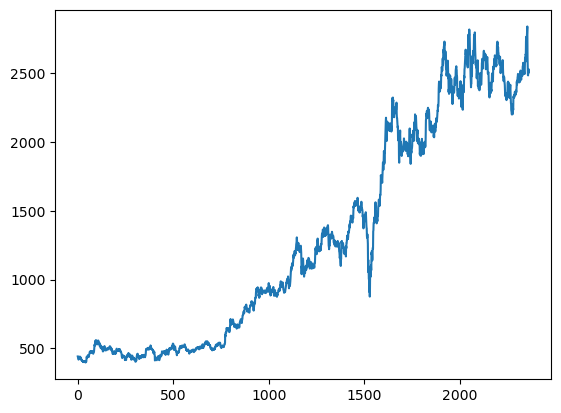

In [7]:
plt.plot(df.Close)

In [15]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2357    2450.944509
2358    2451.965510
2359    2453.549009
2360    2455.350508
2361    2457.190010
Name: Close, Length: 2362, dtype: float64

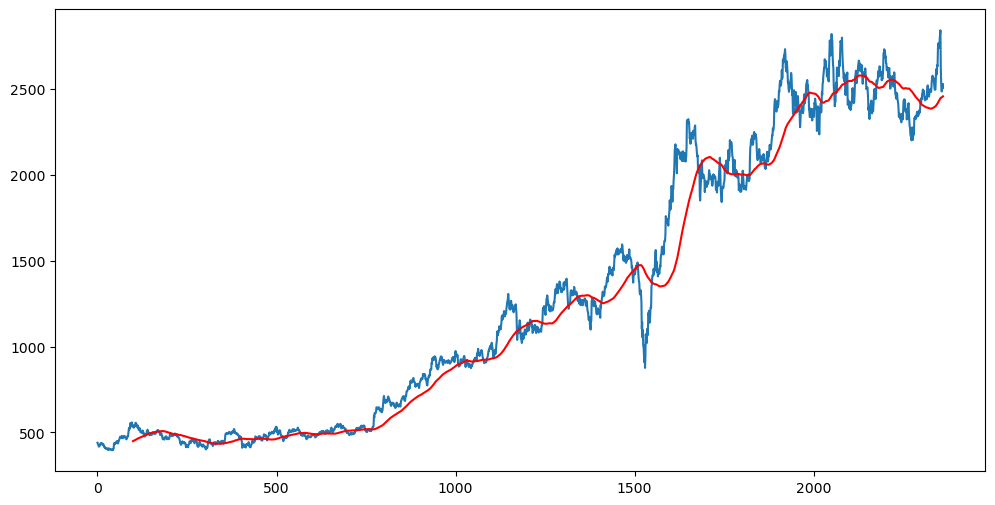

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [18]:
ma200 = df['Close'].rolling(200).mean()

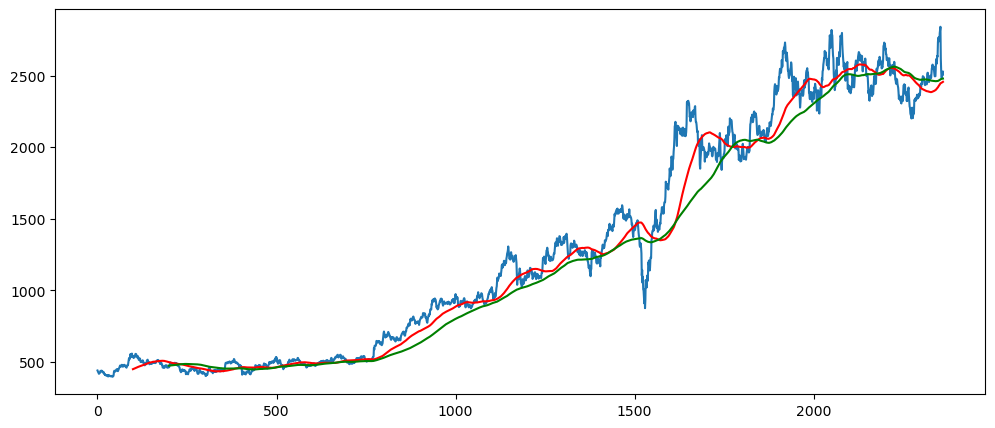

In [19]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [21]:
df.shape

(2362, 6)

In [22]:
#splitting data into training and test
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):])

print(data_training.shape)
print(data_testing.shape)

(1653, 1)
(709, 1)


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [24]:
data_training_array = scaler.fit_transform(data_training)
data_training_array.shape

(1653, 1)

In [25]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [26]:
x_train.shape

(1553, 100, 1)

In [27]:
#ML Model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
from keras.regularizers import l1,l2

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(units=64, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.01), input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(LSTM(units=64, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(LSTM(units=64, activation='tanh', return_sequences=False, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(units=1))

model.compile(optimizer=Adam(), loss='mean_squared_error')


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 64)           16896     
                                                                 
 dropout (Dropout)           (None, 100, 64)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 64)           33024     
                                                                 
 dropout_1 (Dropout)         (None, 100, 64)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 64)           33024     
                                                                 
 dropout_2 (Dropout)         (None, 100, 64)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                3

In [42]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
49/49 [==============================] - 7s 136ms/step - loss: 0.0079
Epoch 2/50
49/49 [==============================] - 8s 162ms/step - loss: 0.0049
Epoch 3/50
49/49 [==============================] - 6s 128ms/step - loss: 0.0049
Epoch 4/50
49/49 [==============================] - 7s 135ms/step - loss: 0.0055
Epoch 5/50
49/49 [==============================] - 6s 127ms/step - loss: 0.0050
Epoch 6/50
49/49 [==============================] - 7s 139ms/step - loss: 0.0044
Epoch 7/50
49/49 [==============================] - 6s 132ms/step - loss: 0.0049
Epoch 8/50
49/49 [==============================] - 6s 128ms/step - loss: 0.0061
Epoch 9/50
49/49 [==============================] - 7s 133ms/step - loss: 0.0066
Epoch 10/50
49/49 [==============================] - 6s 128ms/step - loss: 0.0055
Epoch 11/50
49/49 [==============================] - 7s 138ms/step - loss: 0.0048
Epoch 12/50
49/49 [==============================] - 6s 131ms/step - loss: 0.0049
Epoch 13/50
49/49 [======

In [44]:
model.save('keras.mymodel.h5')

In [46]:
data_testing.head()

,Close
1653,2255.850098
1654,2211.149902
1655,2230.800049
1656,2181.199951
1657,2201.699951


In [47]:
past_100_days = data_training.tail(100)

In [51]:
final_df = past_100_days.append(data_testing,ignore_index=True)

C:\Windows\Temp\ipykernel_13160\3976939425.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [52]:
final_df.head()

,Close
0,1452.234253
1,1421.723511
2,1446.934448
3,1447.033569
4,1492.799805


In [56]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.03024127],
       [0.00894901],
       [0.02654274],
       [0.02661191],
       [0.05855039],
       [0.09646864],
       [0.10683825],
       [0.03940112],
       [0.06109768],
       [0.01887709],
       [0.03524198],
       [0.02222686],
       [0.        ],
       [0.0173069 ],
       [0.02257579],
       [0.01580657],
       [0.01057261],
       [0.02557662],
       [0.04420948],
       [0.03873129],
       [0.07777658],
       [0.08848873],
       [0.09264105],
       [0.11926447],
       [0.12059033],
       [0.11207646],
       [0.08950068],
       [0.11392581],
       [0.08988445],
       [0.12554521],
       [0.14351514],
       [0.14571333],
       [0.14407337],
       [0.17237167],
       [0.24460029],
       [0.23535363],
       [0.21773264],
       [0.22258274],
       [0.21563906],
       [0.23221325],
       [0.21930283],
       [0.20600854],
       [0.22938688],
       [0.24526322],
       [0.26448933],
       [0.30908266],
       [0.28929823],
       [0.271

In [57]:
input_data.shape

(809, 1)

In [59]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test,y_test = np.array(x_test), np.array(y_test)

In [61]:
print(x_test.shape)
print(y_test.shape)

(709, 100, 1)
(709,)


In [62]:
# make predictions
y_pred = model.predict(x_test)

23/23 [==============================] - 2s 38ms/step


In [63]:
y_pred.shape

(709, 1)

In [64]:
y_test

array([0.59105344, 0.55985892, 0.57357199, 0.53895801, 0.55326417,
       0.56341808, 0.58351651, 0.57604943, 0.56969883, 0.56059171,
       0.55930077, 0.59220484, 0.57946888, 0.57542125, 0.57793362,
       0.60839519, 0.61314068, 0.55661393, 0.53518963, 0.53546871,
       0.5213021 , 0.49945918, 0.48714183, 0.49139885, 0.43281337,
       0.43658184, 0.42049611, 0.43127811, 0.45053906, 0.32698273,
       0.30810564, 0.35193126, 0.38110189, 0.4328483 , 0.44788715,
       0.47150982, 0.41055159, 0.39854841, 0.40999335, 0.41411075,
       0.40779507, 0.40357298, 0.39376808, 0.3423706 , 0.37810105,
       0.38741756, 0.37607732, 0.379427  , 0.36351582, 0.38103212,
       0.38330017, 0.38741756, 0.37534453, 0.38333501, 0.408144  ,
       0.43131295, 0.41739066, 0.41655326, 0.40643428, 0.39460548,
       0.39614083, 0.40245642, 0.40660874, 0.37042458, 0.368331  ,
       0.37332072, 0.40842316, 0.41480861, 0.40556195, 0.40936526,
       0.40224711, 0.40378237, 0.40612019, 0.38884813, 0.35266

In [65]:
y_pred

array([[0.51166904],
       [0.515296  ],
       [0.5184213 ],
       [0.52119356],
       [0.5237731 ],
       [0.5263752 ],
       [0.5292436 ],
       [0.53267694],
       [0.5370164 ],
       [0.5424767 ],
       [0.5492213 ],
       [0.5572349 ],
       [0.5663791 ],
       [0.5763319 ],
       [0.58672065],
       [0.5970707 ],
       [0.60686374],
       [0.6156555 ],
       [0.623164  ],
       [0.62917805],
       [0.63355756],
       [0.6363738 ],
       [0.63769263],
       [0.63773423],
       [0.63669765],
       [0.63496035],
       [0.63293624],
       [0.63105875],
       [0.629451  ],
       [0.6284015 ],
       [0.6279173 ],
       [0.6279571 ],
       [0.62824297],
       [0.6282994 ],
       [0.62788355],
       [0.6271944 ],
       [0.6247308 ],
       [0.6198517 ],
       [0.6125879 ],
       [0.60280794],
       [0.59094566],
       [0.5774045 ],
       [0.5629463 ],
       [0.5474049 ],
       [0.53087324],
       [0.51306385],
       [0.4928766 ],
       [0.472

In [66]:
scaler.scale_

array([0.00069786])

In [70]:
scale_factor = 1/0.00069786
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

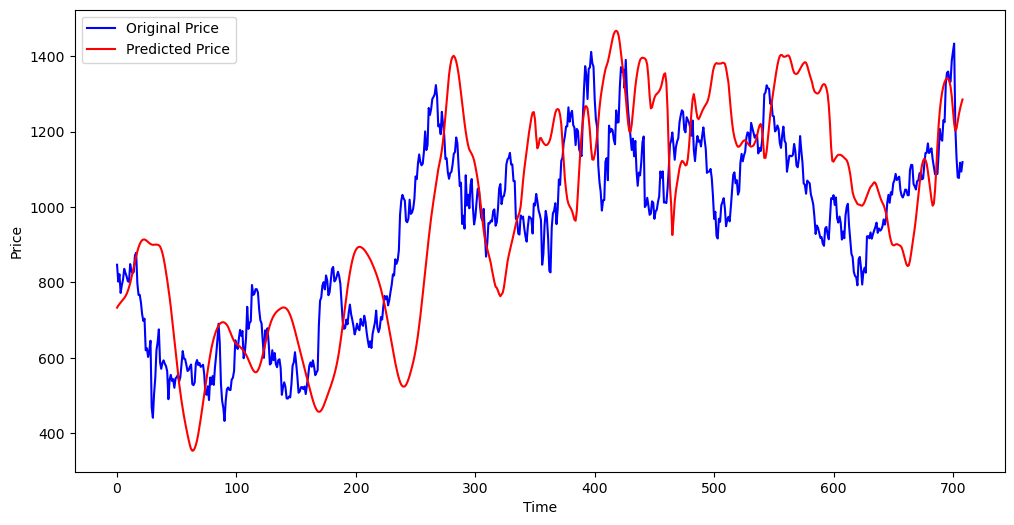

In [72]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b',label='Original Price')
plt.plot(y_pred,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
